# Model Analysis

## Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/scarere/Documents/UofT/OneDrive-UofT/mbp1413_final_project/code')
from utils.segment_metrics import IOU_eval
import torch
from utils.helper_functions import load_data
import numpy as np
import yaml

## Load Metrics

In [43]:
model_path = '../trained_models/preprocessing/thresholded/unet_basic_tr-vr'
save=False

In [44]:
train = pd.read_csv(os.path.join(model_path, 'train_metrics.csv'))
val = pd.read_csv(os.path.join(model_path, 'val_metrics.csv'))
with open(os.path.join(model_path, 'train_args.yaml'), 'r') as file:
    train_args = yaml.load(file, Loader=yaml.FullLoader)

In [45]:
colors = {
    'undistorted': 'm',
    'resampled': 'r',
    'downsized_cropped': 'g'
}

## Plot Loss

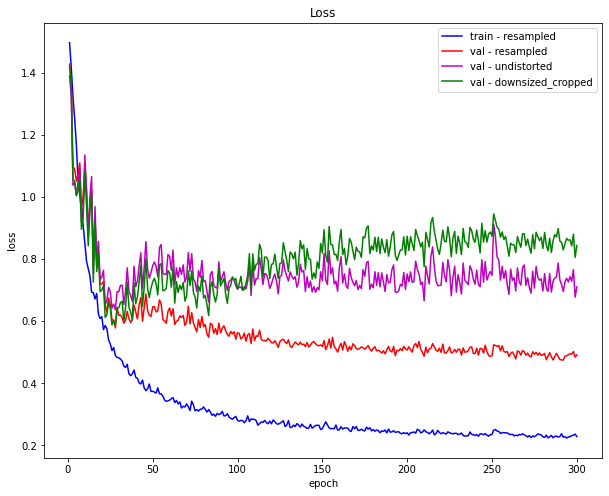

In [46]:


fig = plt.figure(figsize=(10, 8))
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train['epoch'], train['loss'], 'b')
plt.plot(val['epoch'], val['val_loss'], colors[train_args['val_set']])
plt.plot(val['epoch'], val['val_loss_2'], colors[train_args['val_set_2']])
plt.plot(val['epoch'], val['val_loss_3'], colors[train_args['val_set_3']])
plt.legend(['train - ' + train_args['train_set'], 'val - ' + train_args['val_set'], 'val - ' + train_args['val_set_2'], 'val - ' + train_args['val_set_3']])
# plt.ylim(top=1)
#plt.xlim(right=50)
#plt.vlines(20, ymin=0.25, ymax=1.2, colors='r', linestyles='dashed', linewidth=0.75)
#plt.vlines(10, ymin=0.25, ymax=1.2, colors='r', linestyles='dashed', linewidth=0.75)
if save:
    fig.savefig(os.path.join(model_path, 'loss.png'), dpi=300, bbox_inches='tight', facecolor='white')

## Plot IoU

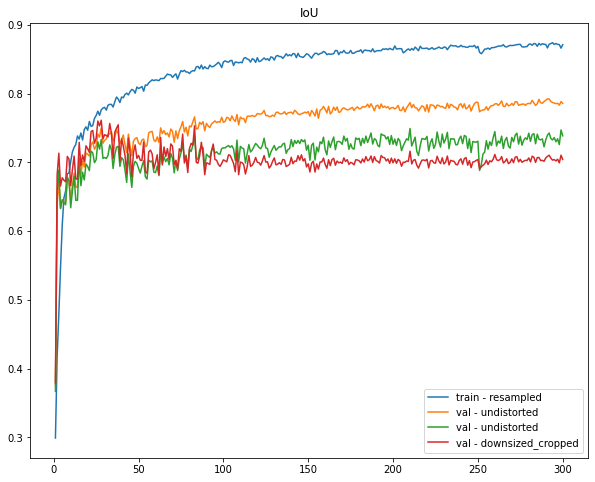

In [47]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train['epoch'], train['IoU'], 'b')
plt.plot(val['epoch'], val['val_IoU'], colors[train_args['val_set']])
plt.plot(val['epoch'], val['val_IoU_2'], colors[train_args['val_set_2']])
plt.plot(val['epoch'], val['val_IoU_3'], colors[train_args['val_set_3']])
plt.title('IoU')
plt.legend(['train - ' + train_args['train_set'], 'val - undistorted', 'val - ' + train_args['val_set_2'], 'val - ' + train_args['val_set_3']])
#plt.ylim(bottom=0.6)
if save:
    fig.savefig(os.path.join(model_path, 'iou.png'), dpi=300, bbox_inches='tight', facecolor='white')